In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [36]:
train_data = data.iloc[:,1:2].values 

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_data = sc.fit_transform(train_data)

In [38]:
#### 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(sc_data[i-60:i,0])
    y_train.append(sc_data[i,0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [39]:
X_train.shape,y_train.shape

((1198, 60), (1198,))

In [40]:
### Reshaping Data for RNN model Input
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [41]:
### Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
regressor = Sequential()
### Adding First LSTM layer
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))
### Adding Second LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
### Adding Third LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
### Adding Fourth/Final LSTM layer
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(rate=0.2))
### Adding Output Layer
regressor.add(Dense(units=1))

In [43]:
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

In [44]:
regressor.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 8s 73ms/step - loss: 0.0352
Epoch 2/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0121
Epoch 3/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0122
Epoch 4/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0115
Epoch 5/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0091
Epoch 6/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0085
Epoch 7/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0084
Epoch 8/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0073
Epoch 9/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0062
Epoch 10/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0068
Epoch 11/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0064
Epoch 12/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0054
Epoch 13/100
38/38 [=====

In [46]:
### Test Data
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_data = data_test.iloc[:,1:2].values 

In [77]:
dataset_full = pd.concat((data['Open'],data_test['Open']),axis=0)
inputs = dataset_full[len(dataset_full)-len(data_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_values = regressor.predict([X_test])
predicted_values = sc.inverse_transform(predicted_values)

In [78]:
predicted_values

array([[783.99756],
       [781.7884 ],
       [785.4279 ],
       [786.32745],
       [790.0089 ],
       [796.0889 ],
       [798.1307 ],
       [796.24994],
       [795.88763],
       [796.20526],
       [796.49554],
       [796.29565],
       [796.12537],
       [797.0697 ],
       [797.78125],
       [804.57886],
       [810.1285 ],
       [814.31   ],
       [813.1619 ],
       [803.98114]], dtype=float32)

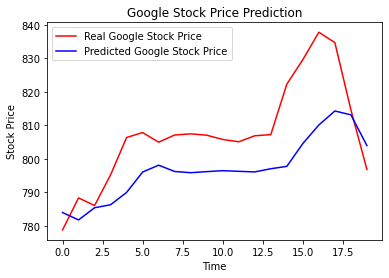

In [80]:
plt.plot(test_data,color='red',label='Real Google Stock Price')
plt.plot(predicted_values,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()